# Grades and The Most Important Component 

# Abstract- Summary
insert the summary here

# 

In [1]:
#pip install utils
#pip install graphviz
#pip install pydotplus
#pip install six


In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import numpy as np
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier



%matplotlib inline
studentmath = pd.read_csv("/Users/amalgamation/Downloads/student/student-mat.csv",encoding='utf-8')
studentmath.head(396)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Business and ML Problem 
The objective of this project is to understand what is the most important feature when it comes to being a successful student. This will be done by using the student Dataset found from the UC Irvene Machine Learning Repoistory.Possible stakeholders for the project could be educators, politicans in the department of justice or parents of students. This is valubale information that can be used to address problem areas that are hindering students success. This problem can be applied to machine learning by using classfication to seperate the various features and observe what is the most important when it comes to the aspects of a student related to succes.       

# Data Dictionary
The data can be found from the University of Minho, Portgual where they found student success in secondary eduacation of two portugese schools. The data was collected in 2008 by Paulo Cortez and Alice Sliva who used school reports and questionaires from students from Gabriel Pereira and Mousinho de Silveira. The Student Dataset will allow us to analyze a wide verirty of factors pertaining to the student's success in school. Education being our future, students success and being able to address factors that are the most sensitive to good grades would help further society and to address and solve the worlds problems quicker. For this specific problem the factor are not only demographics or the amount of hours studied but social, student, and demographic features which makes more students distinct and with this amount of detail, I detailed answer can be made. Information on the dataset specfiaclly the attrubites can be found [here.](https://archive.ics.uci.edu/ml/datasets/Student+Performance "UCI Repository")

# Understanding and Visualizing Your Data

In [3]:
studentmath.isnull()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


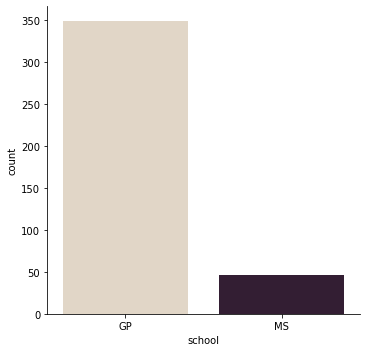

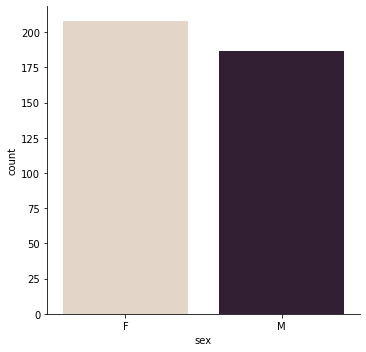

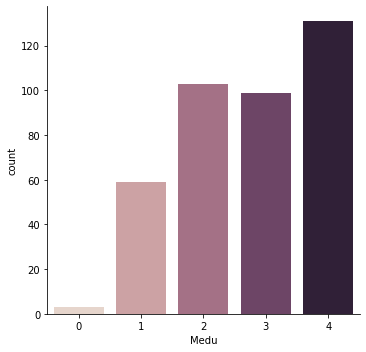

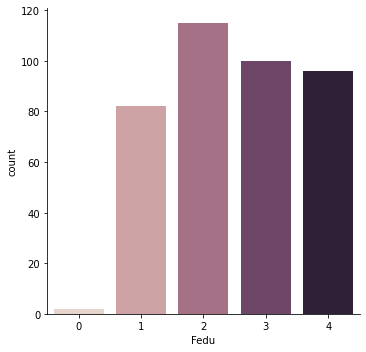

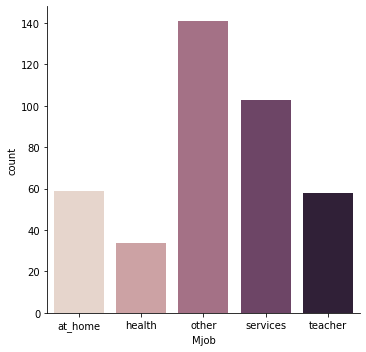

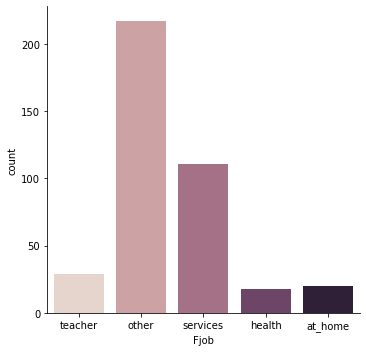

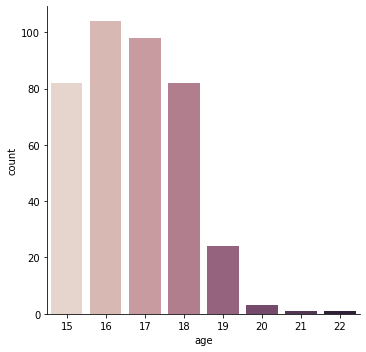

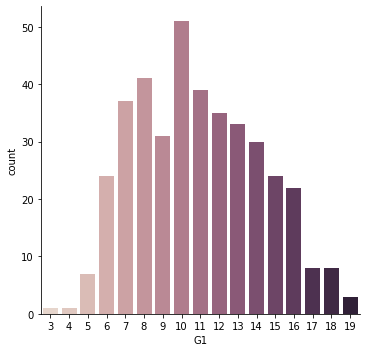

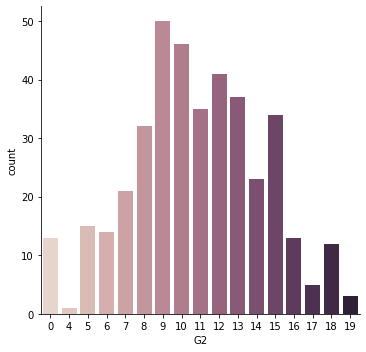

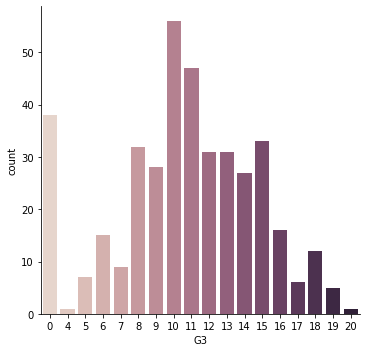

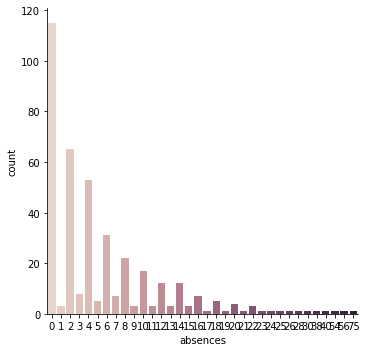

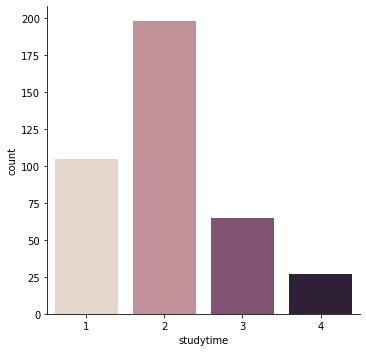

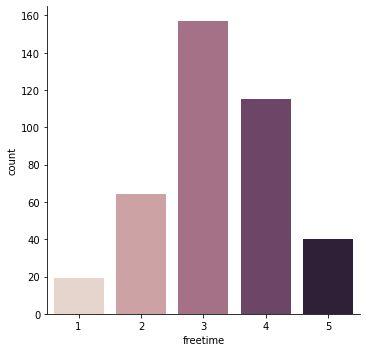

In [4]:
sns.catplot(x="school", kind="count", palette="ch:.25", data=studentmath)
sns.catplot(x="sex", kind="count", palette="ch:.20", data=studentmath)
sns.catplot(x="Medu",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="Fedu",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="Mjob",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="Fjob",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="age",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="G1",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="G2",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="G3",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="absences",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="studytime",kind="count", palette="ch:.10", data=studentmath)
sns.catplot(x="freetime",kind="count", palette="ch:.10", data=studentmath)


From looking at some of the features and how frequently they occur in the dataset has not highlighted any huge flaws with the data besides the huge porportion of studnets being from Gabriel Pereira Highschool. Parents and their respective education level is what expected with most haveing some eduaction. The highest value with fathers's being 2 meaning their highest form of education is at least 5th grade to highest being 9th grade, while the students mother's highest form of education looks like a 4 which means they have had some form of higher education as their highest form of education. 

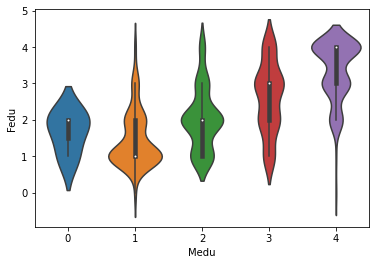

In [5]:

sns.violinplot(x="Medu", y="Fedu", data=studentmath)

The relationship between mother and father highest form of education reached is spread nicely for each level in of education the largest for both parents matches up to each other meaning the majority of highest level of education reached for mothers at level 2 (5th to 9th grade) is matched by the majority of fathers highest level is level 2 as well.  

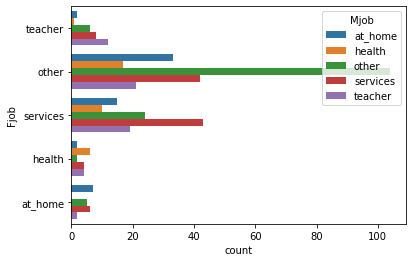

In [6]:
>>> ax = sns.countplot(y="Fjob", hue="Mjob", data=studentmath)


The combnition of jobs for both parents seem to have the highest number with both parents working in another field of work instead of at home,health,service, or teaching. The second largest pairs of parents are both parents working in the service industry and fathers working in an industry outside of the survey and mothers working in the service industry.    

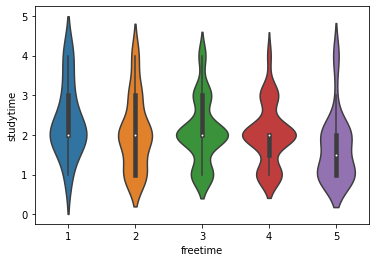

In [7]:
sns.violinplot(x="freetime", y="studytime", data=studentmath)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
Remember study time pretains to on a scale from 1 to 5 how many hours does the student study weekly 1 meaning less than 2 hours and 4 meaning more than 10 hours and freetime on a scale 1 meaing very low and 5 meaning very high. The most common values of the studytime versus the freetime violin graph was 2 for the studytime feature which means that most students study 2 to 5 hours weekly while the longest spread of freetime is either 1 or 5 pertaining so most studnets either feel like they have almost no freetime afterschool specfically less than 2 hours or more than 10 hours of free time after school. Interesting to see the various students with a great amount of free time and a small number of students who use that for studytime.      
 

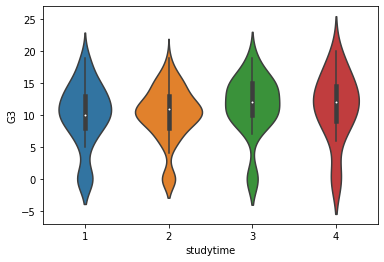

In [8]:
sns.violinplot(x="studytime", y="G3", data=studentmath)

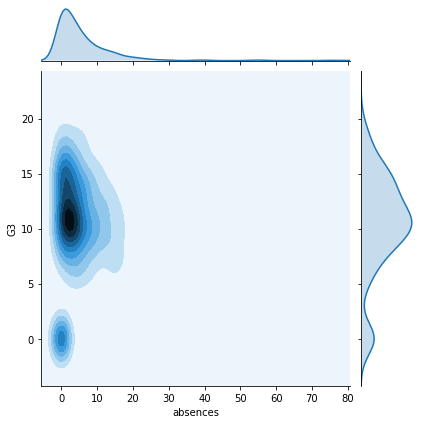

In [9]:
sns.jointplot(x="absences", y="G3", data=studentmath,kind='kde')

This graph is exploring the relationship between the G3 feature which are grades of the students for the final period while the absences is the amount of absensces that the has gained throughout the year. As we thought before, most students are gaining a 10 for the final grade also known as the G3 grade. Most students have a low amount of absenses espically when they are high scoring students.    

# Data Preparation

The most common values for most of the features are numeric while some other ones binary, the very lowest amount of features were the nominal values. The classifiction will use numeric values, and binary values will be between 0 and 1.Some values are already assigned to numbers while some other features need to be transformed for the classifier. For a classifier, we need to add another feature, which is whether the student passed or not. Students pass highschool in Portgual by earning atleast a 10 on a 20 point scale.       

In [10]:
# Add a new column named 'Pass/Fail' 
studentmath['Pass/Fail'] = [1 if x >=10 else 0 for x in studentmath['G3']]
studentmath["Pass/Fail"] = pd.to_numeric(studentmath["Pass/Fail"])


The feature is added to see which student falls under, and gives the classfier a clear objective.

In [11]:

studentmath = pd.get_dummies(studentmath, columns=['school', 'sex','address', 'famsize', 'Pstatus', "Mjob","Fjob","reason","guardian","schoolsup","famsup","paid","activities","nursery","higher","internet","romantic"])

Used one hot encoding to make the binary and nominal data features more recognizable for our model. 

In [12]:
studentmath.drop(columns=['G1', 'G2','G3'])

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [13]:
studentmath_train, studentmath_test = model_selection.train_test_split(studentmath, 
                      test_size=0.3)


The nominal features were changed to numeric features using One Hot Encoder which changes them into binary values, that is placed in an orthogonal vector space. 

# Modeling

In [14]:

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(studentmath_train.drop("Pass/Fail", axis=1))
studentmath_scaled= pd.DataFrame(X, columns=studentmath_train.drop("Pass/Fail", axis=1).columns, index=studentmath_train.index)
studentmath_scaled["Pass/Fail"] = studentmath_train["Pass/Fail"]
studentmath_scaled.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Pass/Fail
372,0.285714,0.50,0.50,0.000000,0.666667,0.0,0.50,0.75,0.50,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
65,0.142857,1.00,0.75,0.666667,0.333333,0.0,1.00,0.75,0.50,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
321,0.285714,0.50,0.50,0.000000,0.333333,0.0,0.75,0.25,0.25,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0
37,0.142857,1.00,1.00,0.333333,0.666667,0.0,0.25,0.75,0.50,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
303,0.285714,0.75,0.50,0.000000,1.000000,0.0,1.00,0.25,0.25,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1


Scaled the data accordingly in order to minimize outliers and see which features are really affect the student’s success the most. 

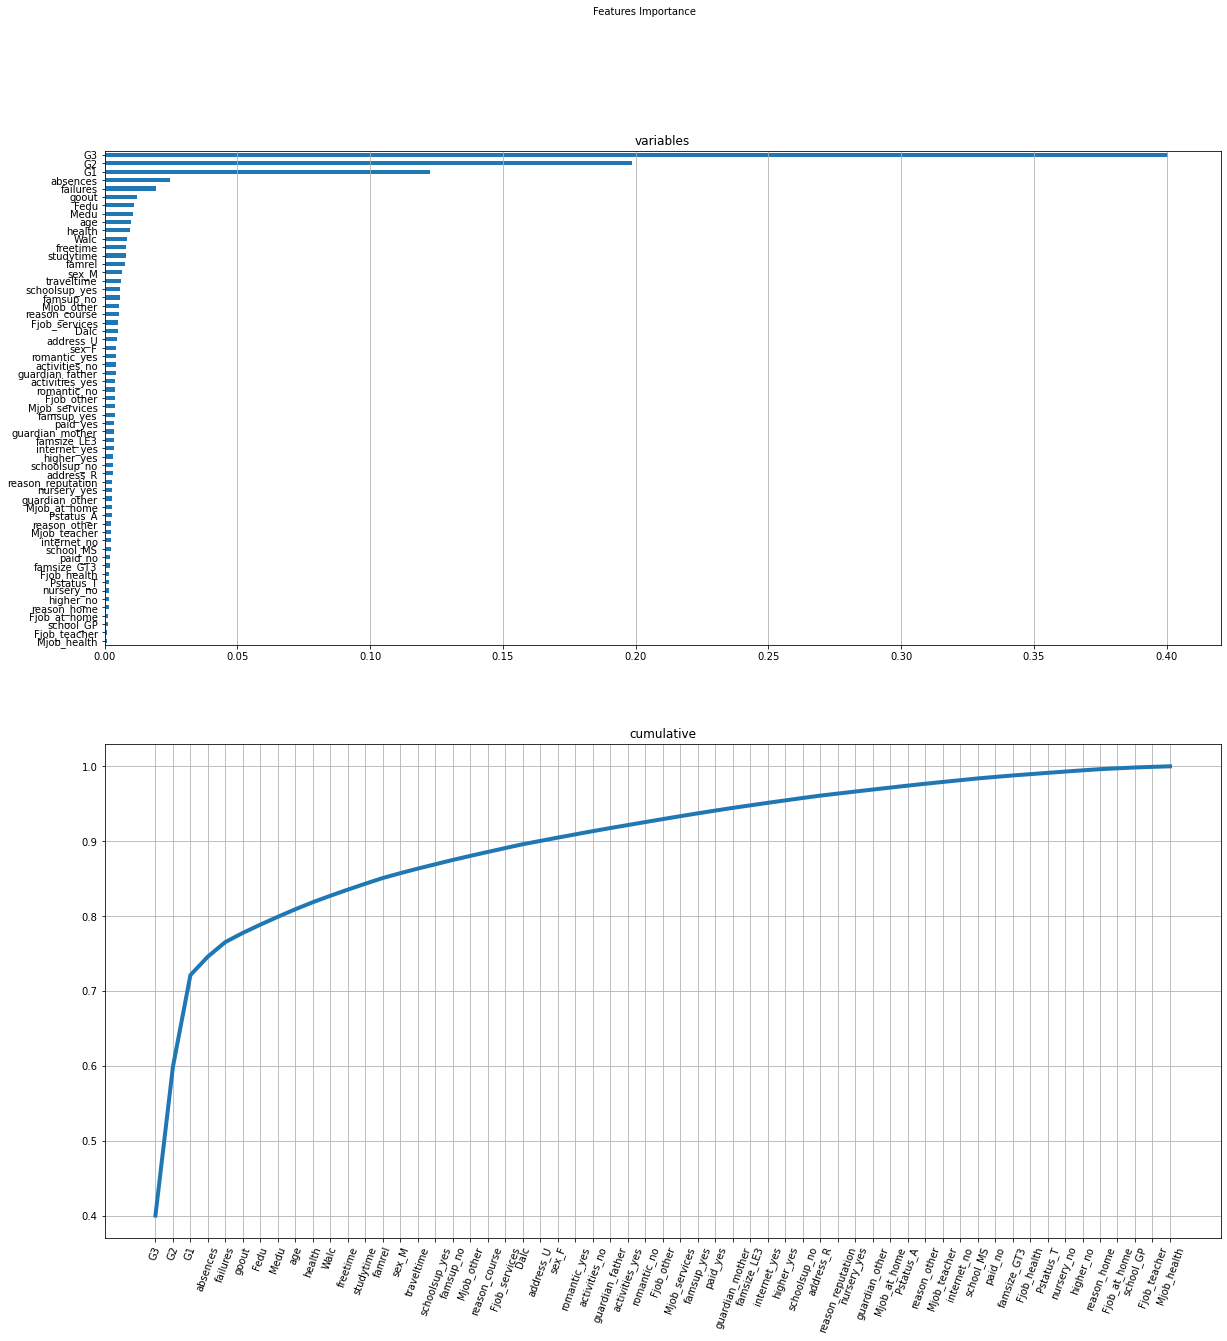

In [15]:
X = studentmath_train.drop("Pass/Fail", axis=1).values
y = studentmath_train["Pass/Fail"].values
feature_names = studentmath_train.drop("Pass/Fail", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
studentmath_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
studentmath_importances['cumsum'] =  studentmath_importances['IMPORTANCE'].cumsum(axis=0)
studentmath_importances = studentmath_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False,figsize=(20,20))
fig.suptitle("Features Importance", fontsize=10)
ax[0].title.set_text('variables')
studentmath_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
studentmath_importances[["cumsum"]].plot(kind="line", linewidth=4,legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(studentmath_importances)), 
          xticklabels=studentmath_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()


In [16]:
X_names = ["age", "failures","absences","freetime","goout"]
X_train = studentmath_train[X_names].values
y_train = studentmath_train["Pass/Fail"].values
X_test = studentmath_test[X_names].values
y_test = studentmath_test["Pass/Fail"].values

    The reason G1, G2, and G3 are not used is due to the fact that grades shouldn't be an indicition of bad grades. Its obvious that once G1 and G2 pass which are the 2 periods of the school year. The final grade also known as G3 is pretty much known. Educators and parents need to be able address the signs of a poor performance before grades are even calculated in order to address problems as soon as possible and allow more time to turn things around.  

In [17]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
filled=True, rounded=True,
grap= pydotplus.graph_from_dot_data(dot_data.getvalue())

SyntaxError: invalid syntax (<ipython-input-32-d153f65bc1b3>, line 9)

[Text(755.625, 951.3000000000001, 'X[1] <= 0.5\nentropy = 0.903\nsamples = 276\nvalue = [88, 188]'),
 Text(465.0, 679.5, 'X[2] <= 21.5\nentropy = 0.798\nsamples = 215\nvalue = [52, 163]'),
 Text(232.5, 407.70000000000005, 'X[4] <= 2.5\nentropy = 0.776\nsamples = 210\nvalue = [48, 162]'),
 Text(116.25, 135.89999999999998, 'entropy = 0.58\nsamples = 65\nvalue = [9, 56]'),
 Text(348.75, 135.89999999999998, 'entropy = 0.84\nsamples = 145\nvalue = [39, 106]'),
 Text(697.5, 407.70000000000005, 'X[0] <= 16.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(581.25, 135.89999999999998, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(813.75, 135.89999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(1046.25, 679.5, 'X[3] <= 1.5\nentropy = 0.976\nsamples = 61\nvalue = [36, 25]'),
 Text(930.0, 407.70000000000005, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(1162.5, 407.70000000000005, 'X[2] <= 1.0\nentropy = 0.94\nsamples = 56\nvalue = [36, 20]'),
 Text(1046.25, 13

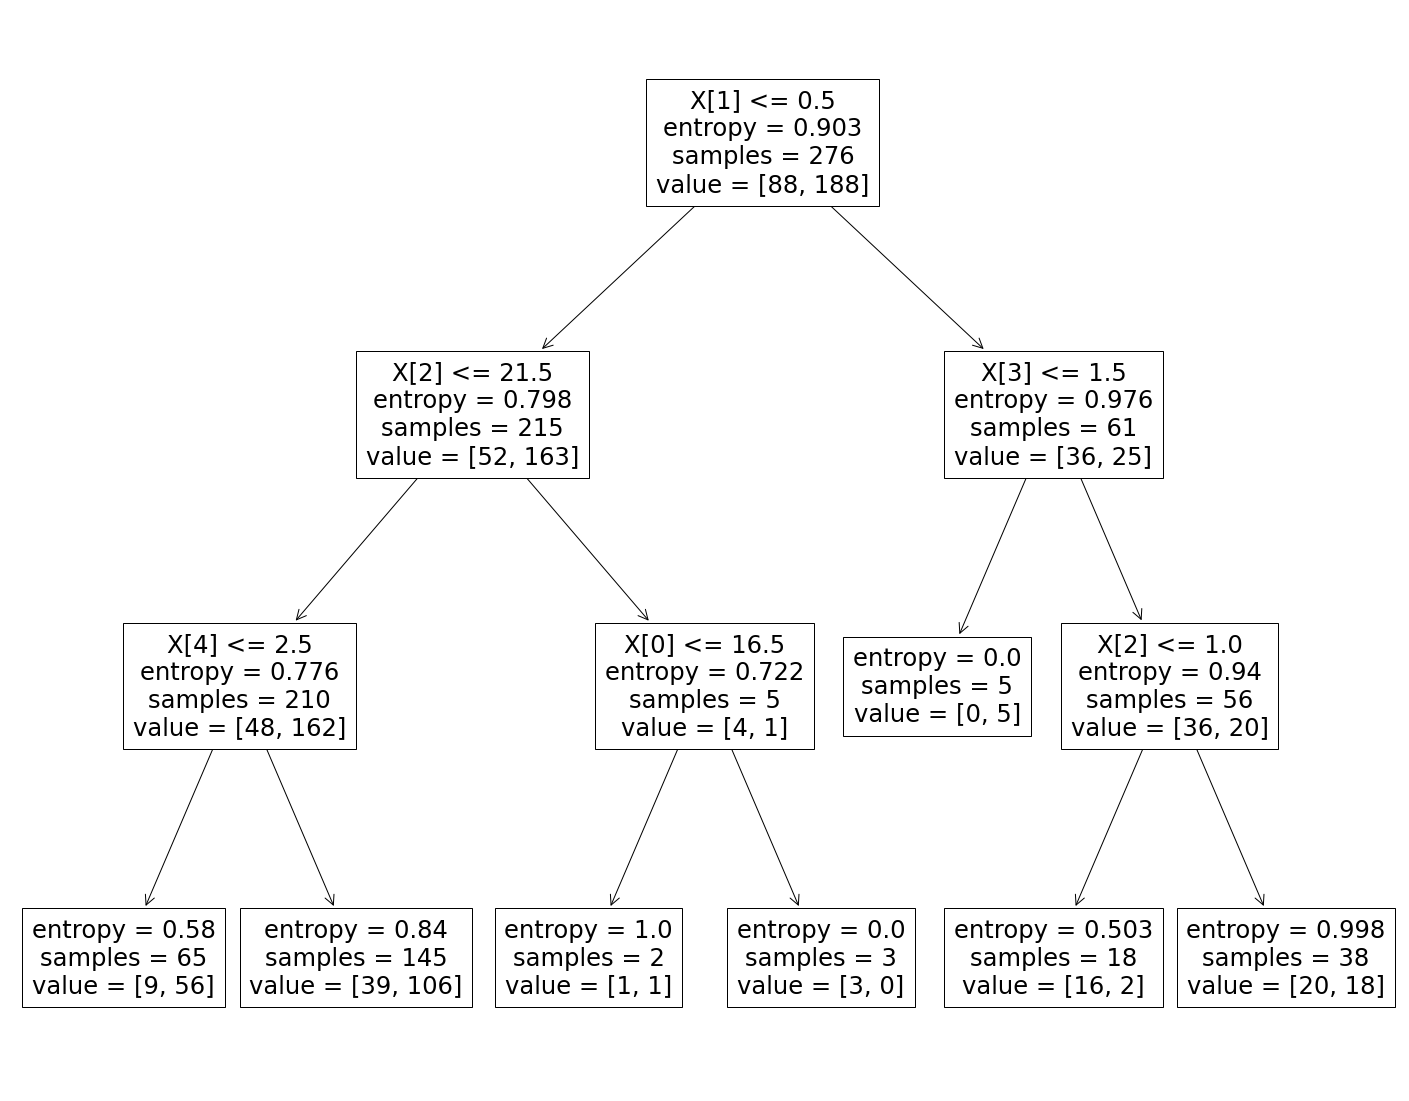

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)
fig.savefig("decistion_tree_student.png")

# Model Evaluation & Selection

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7226890756302521


# Conclusions

The classifier is somewhat accurate with a accuracy of 72% using just the absenses, age, free time and the amount the student goes out features. From our findings here we can suggest to students to show up to class, find time in their schedules and more displince when it comes to going out. These are the results I was expecting when going into this project. Highschool students are given a large amount of freedom which can lead to them getting distracted from their studies or ignoring them enetirely. We see this with the use in free time and the number of absences. A limitation that was seen was the inability to add the other dataset which is the subject of Porteguese being studied instead of Math. This would lead to a broader list of features being studied. Possibly, another feature arises as important to success due to the addition.      